In [1]:
from twython import Twython

ModuleNotFoundError: No module named 'twython'

In [2]:
API_KEY = 'xxxxxxxxxxxx'
API_SECRET_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

NameError: name 'Twython' is not defined

In [3]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '0000000'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

NameError: name 'Twython' is not defined

In [4]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

NameError: name 'Twython' is not defined

In [5]:
user = twitter.show_user(screen_name='OSoMe_IU')
user

NameError: name 'twitter' is not defined

In [6]:
user['screen_name']

NameError: name 'user' is not defined

In [7]:
print("""
Twitter user @{screen_name}
has {followers_count} followers,
follows {friends_count} users,
and has tweeted {statuses_count} times.
""".format(**user))

NameError: name 'user' is not defined

In [8]:
most_recent_tweet = user['status']
most_recent_tweet

NameError: name 'user' is not defined

In [9]:
most_recent_tweet['text']

NameError: name 'most_recent_tweet' is not defined

In [10]:
most_recent_tweet['entities']

NameError: name 'most_recent_tweet' is not defined

In [11]:
most_recent_tweet['entities']['user_mentions']

NameError: name 'most_recent_tweet' is not defined

In [12]:
search_response = twitter.search(q='#science', count=100)

NameError: name 'twitter' is not defined

In [13]:
search_tweets = search_response['statuses']
tweet = search_tweets[0]
tweet

NameError: name 'search_response' is not defined

In [14]:
tweet['user']

NameError: name 'tweet' is not defined

In [15]:
# even with count=1000, we still get at most 100 tweets
search_response = twitter.search(q='#science', count=1000)
len(search_response['statuses'])

NameError: name 'twitter' is not defined

In [16]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

NameError: name 'twitter' is not defined

In [17]:
type(cursor)

NameError: name 'cursor' is not defined

In [18]:
twitter.get_application_rate_limit_status()['resources']['search']

NameError: name 'twitter' is not defined

In [19]:
import networkx as nx

D = nx.DiGraph()

publisher = twitter.show_user(screen_name='CambridgeUP')
author = twitter.show_user(screen_name='osome_iu')

D.add_edge(publisher['screen_name'], author['screen_name'], weight=1)

NameError: name 'twitter' is not defined

In [20]:
list(D.edges(data=True))

[]

In [21]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

NameError: name 'twitter' is not defined

In [22]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

NameError: name 'search_tweets' is not defined

In [23]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

In [24]:
max(D.nodes, key=D.out_degree)

ValueError: max() arg is an empty sequence

In [25]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[]

In [26]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[]

In [27]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[]

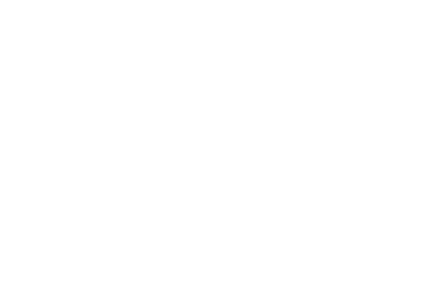

In [28]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

In [29]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

NameError: name 'twitter' is not defined

In [30]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

NameError: name 'search_tweets' is not defined

In [31]:
max(D.nodes, key=D.in_degree)

ValueError: max() arg is an empty sequence

In [32]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[]

In [33]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[]

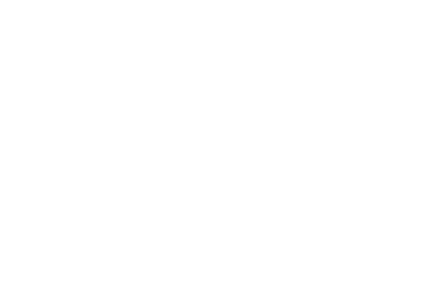

In [34]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)